<a href="https://colab.research.google.com/github/gabrielgarciae/pyspark-exploratory-data-analysis/blob/main/Spark_course_udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Installing PySpark and setting up the environment**

In [ ]:
#preparing the environment to use PySpark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null #install dependencies (Java)

In [ ]:
#install Spark
#download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

#unpacking the files
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

#install PySpark, it's need to be the same version of Spark
#pip install pyspark==3.1.2

In [ ]:
#configuring the environment
import os

#setting the Java enviroment variable
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

#setting the Spark enviroment variable
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
#installing a findspark
!pip install -q findspark

#importing a findspark
import findspark

#starting o findspark
findspark.init()

In [ ]:
#loggin in
#importing the required package
from pyspark.sql import SparkSession

#starting spark context
sc = SparkSession.builder.master('local[*]').getOrCreate()
#checking if the session was created
sc

### **Entering data for Apache Spark**

In [ ]:
#download of a free table
#source: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda
!wget --verbose --show-progress --no-check-certificate https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv

--2023-03-21 18:10:36--  https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/dados-abertos-precos-2021-12-glp.csv
Resolving www.gov.br (www.gov.br)... 161.148.164.31
Connecting to www.gov.br (www.gov.br)|161.148.164.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2623526 (2.5M) [text/csv]
Saving to: ‘dados-abertos-precos-2021-12-glp.csv’

dados-abertos-preco 100%[===================>]   2.50M   645KB/s    in 4.0s    

2023-03-21 18:10:40 (645 KB/s) - ‘dados-abertos-precos-2021-12-glp.csv’ saved [2623526/2623526]



In [ ]:
 #reading the dataset
precogas = sc.read.csv("/content/dados-abertos-precos-2021-12-glp.csv", 
                       inferSchema=True, header=True,
                       sep = ';', 
                       #encoding = "ISO-8859-1")
                       encoding = "UTF-8")

In [ ]:
#showing the dataset
precogas.show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 k

### **Knowing the structure of your SparkDataFrame**

In [ ]:
#necessary imports
from pyspark import *
from pyspark.sql import *

In [ ]:
#checking the type of created object
type(precogas)

pyspark.sql.dataframe.DataFrame

In [ ]:
#checking the schema() of this sparkdataframe
precogas.printSchema()

#also can use
precogas.dtypes

root
 |-- Regiao - Sigla: string (nullable = true)
 |-- Estado - Sigla: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Revenda: string (nullable = true)
 |-- CNPJ da Revenda: string (nullable = true)
 |-- Nome da Rua: string (nullable = true)
 |-- Numero Rua: string (nullable = true)
 |-- Complemento: string (nullable = true)
 |-- Bairro: string (nullable = true)
 |-- Cep: string (nullable = true)
 |-- Produto: string (nullable = true)
 |-- Data da Coleta: string (nullable = true)
 |-- Valor de Venda: string (nullable = true)
 |-- Valor de Compra: string (nullable = true)
 |-- Unidade de Medida: string (nullable = true)
 |-- Bandeira: string (nullable = true)



[('Regiao - Sigla', 'string'),
 ('Estado - Sigla', 'string'),
 ('Municipio', 'string'),
 ('Revenda', 'string'),
 ('CNPJ da Revenda', 'string'),
 ('Nome da Rua', 'string'),
 ('Numero Rua', 'string'),
 ('Complemento', 'string'),
 ('Bairro', 'string'),
 ('Cep', 'string'),
 ('Produto', 'string'),
 ('Data da Coleta', 'string'),
 ('Valor de Venda', 'string'),
 ('Valor de Compra', 'string'),
 ('Unidade de Medida', 'string'),
 ('Bandeira', 'string')]

In [ ]:
#counting how many rows the dataset has
precogas.count()

15765

In [ ]:
#listing the headers
precogas.columns

['Regiao - Sigla',
 'Estado - Sigla',
 'Municipio',
 'Revenda',
 'CNPJ da Revenda',
 'Nome da Rua',
 'Numero Rua',
 'Complemento',
 'Bairro',
 'Cep',
 'Produto',
 'Data da Coleta',
 'Valor de Venda',
 'Valor de Compra',
 'Unidade de Medida',
 'Bandeira']

In [ ]:
#counting how many columns the dataset has
len(precogas.columns)

16

### **Manipulating columns in a SparkDataFrame**




In [ ]:
#importing methods with functions for variable transformations
from pyspark.sql.functions import *

In [ ]:
#selecting only some columns from the dataset
precogas.select('Revenda','Bandeira','Data da Coleta','Valor de Venda').show(20)

#other way to select some columns and rename it
precogas.select('Revenda','Bandeira',col('Data da Coleta').alias('Data_da_Coleta'),'Valor de Venda').show(20)

+--------------------+--------------------+--------------+--------------+
|             Revenda|            Bandeira|Data da Coleta|Valor de Venda|
+--------------------+--------------------+--------------+--------------+
|CONSIGAZ DISTRIBU...|            CONSIGAZ|    01/12/2021|         97,99|
|AUTO POSTO AMAPA ...|               FOGAS|    01/12/2021|           115|
|AUTO POSTO ACAUAN...|           AMAZONGÁS|    01/12/2021|           110|
|AUTO POSTO CANIND...|           AMAZONGÁS|    01/12/2021|           115|
|AUTO POSTO AEROPO...|           AMAZONGÁS|    01/12/2021|           115|
|SOUSA & ALVES COM...|SUPERGASBRAS ENERGIA|    01/12/2021|         99,99|
|MARLIM COMBUSTIVE...|            LIQUIGÁS|    01/12/2021|         98,99|
|AUTO SHOPPING DER...|            ULTRAGAZ|    01/12/2021|         98,99|
|LR COMERCIO DE PR...|              BRANCA|    01/12/2021|         99,99|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|    01/12/2021|         99,99|
|CASCOL COMBUSTIVE...|            LIQU

In [ ]:
#other way to declare a dataset column, it will be useful later
precogas.select(precogas.Revenda.alias('Revendedora'),precogas.Bandeira).show()

+--------------------+--------------------+
|         Revendedora|            Bandeira|
+--------------------+--------------------+
|CONSIGAZ DISTRIBU...|            CONSIGAZ|
|AUTO POSTO AMAPA ...|               FOGAS|
|AUTO POSTO ACAUAN...|           AMAZONGÁS|
|AUTO POSTO CANIND...|           AMAZONGÁS|
|AUTO POSTO AEROPO...|           AMAZONGÁS|
|SOUSA & ALVES COM...|SUPERGASBRAS ENERGIA|
|MARLIM COMBUSTIVE...|            LIQUIGÁS|
|AUTO SHOPPING DER...|            ULTRAGAZ|
|LR COMERCIO DE PR...|              BRANCA|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|
|CASCOL COMBUSTIVE...|            LIQUIGÁS|
|CASCOL COMBUSTIVE...|            ULTRAGAZ|
|POSTO DOS PODERES...|SUPERGASBRAS ENERGIA|
|RIBEIRO DE MENDON...|             COPAGAZ|
|AUTO POSTO MALIBU...|            LIQUIGÁS|
| POSTO ROUXINOL LTDA|             COPAGAZ|
|GABIATTI & GABIAT...|            LIQUIGÁS|
|AUTO POSTO GK EIRELI| NACIONAL GÁS BUTANO|
|GP PETROLEO COMER...|SUPERGASBRAS ENERGIA|
|IRMAOS TEIXEIRA LTDA|          

In [ ]:
#duplicating the "Bandeira" column and putting the letters in lower case
precogas.withColumn(colName = "teste", col = lower('Bandeira')).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|               teste|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP

In [ ]:
#duplicating the "Bandeira" column
precogas.withColumn("teste", precogas.Bandeira).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|               teste|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP

In [ ]:
#replacing column values
precogas.withColumn(
    colName = 'Data da Coleta', 
    col = regexp_replace('Data da Coleta','/','-')
    ).show()

#other way
precogas.replace( 
  to_replace = 'GLP',
  value = 'GAS DE COZINHA', 
  subset = 'produto').show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01-12-2021|         97,99|           null|       R$ / 13 k

In [ ]:
#renaming column
precogas.withColumnRenamed(existing = 'Estado - Sigla', new = 'Estado').show()

+--------------+------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|    SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg|            CONSIGAZ|
|       

In [ ]:
#deleting column
precogas.drop('Municipio','Revenda').show()

+--------------+--------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    01/12/2021|         97,99|           null|       R$ / 13 kg|            CONSIGAZ|
|             N|            AC| 00.529.581/0001-53|    VIA CHICO MENDES|      3570|            null|            

### **Useful Transformations for a Data Analyst**

In [ ]:
#checking the types of variables
precogas.printSchema()

root
 |-- Regiao - Sigla: string (nullable = true)
 |-- Estado - Sigla: string (nullable = true)
 |-- Municipio: string (nullable = true)
 |-- Revenda: string (nullable = true)
 |-- CNPJ da Revenda: string (nullable = true)
 |-- Nome da Rua: string (nullable = true)
 |-- Numero Rua: string (nullable = true)
 |-- Complemento: string (nullable = true)
 |-- Bairro: string (nullable = true)
 |-- Cep: string (nullable = true)
 |-- Produto: string (nullable = true)
 |-- Data da Coleta: string (nullable = true)
 |-- Valor de Venda: string (nullable = true)
 |-- Valor de Compra: string (nullable = true)
 |-- Unidade de Medida: string (nullable = true)
 |-- Bandeira: string (nullable = true)



### **Fixing variable types of a SparkDataFrame**

In [ ]:
#replacing '/' to '-' and changing the variable to date type
precogas = precogas.withColumn(
    colName = 'Data da Coleta', 
    col = to_date(
            col = regexp_replace('Data da Coleta','/','-'),
            format = "dd-MM-yyyy"
          )
    )

#cheking the result
precogas.select('Data da Coleta').printSchema()
precogas.show()

root
 |-- Data da Coleta: date (nullable = true)

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    2021-12-

In [ ]:
#putting price by number
precogas = precogas.withColumn(
    colName = 'Valor de Venda', 
    col = regexp_replace('Valor de Venda',',','.').cast('float')
    )

#cheking the result
precogas.select('Valor de Venda').printSchema()
precogas.show()


root
 |-- Valor de Venda: float (nullable = true)

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    2021-12

### **Categorizing variables**

In [ ]:
#doing a case
precogas.withColumn(
    colName = 'Faixa_Preco', 
    col = (
        when(precogas['Valor de Venda']<100,' abaixo de R$100,00').
        when(((precogas['Valor de Venda']>=100) & 
            (precogas['Valor de Venda']<110)),'de R$100 a R$109,99').
       otherwise('R$110,00 ou mais')
    )
    ).show()

In [ ]:
#creating a year attribute of a variable that contains date
precogas.withColumn(
    colName = 'Ano', 
    col = (precogas['Data da Coleta'].substr(0, 4)  )
    ).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+----+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|     Complemento|           Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira| Ano|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+----------------+-----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+----+
|            SE|            SP| SAO VICENTE|CONSIGAZ DISTRIBU...| 01.597.589/0003-81| RUA MANOEL DE ABREU|       790|      QUADRA 108|   CIDADE NAUTICA|11355-400|    GLP|    2021-12-01|         97.99|           null| 

In [ ]:
#selecting only quotations made in the city of Salvador
precogas.filter(precogas.Municipio == 'SALVADOR').show()

+--------------+--------------+---------+--------------------+-------------------+--------------------+----------+--------------------+--------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|         Complemento|        Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+---------+--------------------+-------------------+--------------------+----------+--------------------+--------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|            NE|            BA| SALVADOR|NADIR DE ALMEIDA ...| 04.997.975/0001-97|    RUA DOS JESUITAS|        10|   QUADRA 02 LOTE 98|    DOM AVELAR|41315-160|    GLP|    2021-12-01|          94.0|           null|       R$ / 13 kg|SUPERG

In [ ]:
#selecting only quotations made in Acre or Bahia
precogas.filter(
    (precogas['Estado - Sigla'] == 'AC') | 
    (precogas['Estado - Sigla'] == 'BA')
    ).show()

+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+--------------------+----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|Regiao - Sigla|Estado - Sigla|   Municipio|             Revenda|    CNPJ da Revenda|         Nome da Rua|Numero Rua|         Complemento|          Bairro|      Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|            Bandeira|
+--------------+--------------+------------+--------------------+-------------------+--------------------+----------+--------------------+----------------+---------+-------+--------------+--------------+---------------+-----------------+--------------------+
|             N|            AC|  RIO BRANCO|AUTO POSTO AMAPA ...| 00.529.581/0001-53|    VIA CHICO MENDES|      3570|                null|           AREAL|69906-119|    GLP|    2021-12-01|         115.0|           null|    

In [ ]:
#selecting only quotations made in São Paulo by day 10/12/2022
precogas.filter(
    (col('Estado - Sigla') == 'SP') & 
    (col('Data da Coleta') == '10/12/2022')
    ).show()

+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+
|Regiao - Sigla|Estado - Sigla|Municipio|Revenda|CNPJ da Revenda|Nome da Rua|Numero Rua|Complemento|Bairro|Cep|Produto|Data da Coleta|Valor de Venda|Valor de Compra|Unidade de Medida|Bandeira|
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+
+--------------+--------------+---------+-------+---------------+-----------+----------+-----------+------+---+-------+--------------+--------------+---------------+-----------------+--------+



In [ ]:
#selecting only quotations made in BA with price below R$80
precogas.filter(
    (precogas['Estado - Sigla'] == 'BA') & 
    (precogas['Valor de Venda'] >120)
    ).show()

In [ ]:
#selecting rows with 'where'
precogas.where(
    (col('Estado - Sigla') == 'BA') & 
    (col('Valor de Venda') < 85)
    ).show()

### **Summary measures of numeric variables from a SparkDataFrame**

In [ ]:
#summarizing numeric variables
precogas.select('Valor de Venda').describe().show()

+-------+------------------+
|summary|    Valor de Venda|
+-------+------------------+
|  count|             15765|
|   mean|103.29313201371957|
| stddev| 8.951108633678142|
|    min|             77.99|
|    max|             140.0|
+-------+------------------+



In [ ]:
#summarizing numeric variables with summary
precogas.select('Valor de Venda').summary().show()

+-------+------------------+
|summary|    Valor de Venda|
+-------+------------------+
|  count|             15765|
|   mean|103.29313201371957|
| stddev| 8.951108633678142|
|    min|             77.99|
|    25%|             97.99|
|    50%|             102.0|
|    75%|             110.0|
|    max|             140.0|
+-------+------------------+



In [ ]:
#summarizing numeric variables with summary limiting the statistics
precogas.select('Valor de Venda')\
.summary("min", "5%","25%", "50%","75%", "95%","max")\
.show()

In [ ]:
#some individual stats
precogas.select(
  mean('Valor de Venda').alias('Preço médio'),
  percentile_approx('Valor de Venda',0.5).alias('Preço Mediano'),
  percentile_approx('Valor de Venda',0.25).alias('Q1 do Preço'),
  percentile_approx('Valor de Venda',0.75).alias('Q3 do Preço'),
  min('Valor de Venda').alias('Preço Mínimo'),
  max('Valor de Venda').alias('Preço Máximo')
).show()

### **Frequency Tables in PySpark**

In [ ]:
#checking how many quotations were made by region of Brazil
precogas.groupBy('Regiao - Sigla').count().orderBy(col("count").desc()).show()

+--------------+-----+
|Regiao - Sigla|count|
+--------------+-----+
|            SE| 6905|
|             S| 3037|
|            NE| 2621|
|            CO| 1718|
|             N| 1484|
+--------------+-----+



In [ ]:
#quotations by state crossed by regions of Brazil
precogas.crosstab('Estado - Sigla', 'Regiao - Sigla').show()

+-----------------------------+---+---+---+----+----+
|Estado - Sigla_Regiao - Sigla| CO|  N| NE|   S|  SE|
+-----------------------------+---+---+---+----+----+
|                           MA|  0|  0|144|   0|   0|
|                           GO|663|  0|  0|   0|   0|
|                           CE|  0|  0|573|   0|   0|
|                           AC|  0|114|  0|   0|   0|
|                           PR|  0|  0|  0|1317|   0|
|                           DF|210|  0|  0|   0|   0|
|                           ES|  0|  0|  0|   0| 399|
|                           RJ|  0|  0|  0|   0| 808|
|                           RO|  0|178|  0|   0|   0|
|                           SP|  0|  0|  0|   0|3996|
|                           PB|  0|  0|223|   0|   0|
|                           SE|  0|  0| 89|   0|   0|
|                           RR|  0| 97|  0|   0|   0|
|                           RS|  0|  0|  0|1469|   0|
|                           BA|  0|  0|558|   0|   0|
|                           

In [ ]:
#cheking the average price by region of Brazil
precogas.groupBy('Regiao - Sigla').mean('Valor de Venda').show()

+--------------+-------------------+
|Regiao - Sigla|avg(Valor de Venda)|
+--------------+-------------------+
|            NE|   99.8615030072564|
|             N| 111.42243928729363|
|             S|  104.3858051268647|
|            SE| 101.12792719040635|
|            CO|  108.2772406821201|
+--------------+-------------------+



In [ ]:
#cheking the average price by region of Brazil
precogas.groupBy('Estado - Sigla').min('Valor de Venda').show(27)

+--------------+-------------------+
|Estado - Sigla|min(Valor de Venda)|
+--------------+-------------------+
|            SC|              95.99|
|            RO|              100.0|
|            PI|              99.99|
|            AM|               97.0|
|            RR|              105.0|
|            GO|              89.49|
|            TO|              94.99|
|            MT|              84.99|
|            SP|              79.99|
|            PB|              89.99|
|            ES|              79.99|
|            RS|               85.0|
|            MS|               89.0|
|            AL|              86.99|
|            MG|               84.9|
|            PA|               87.0|
|            BA|              77.99|
|            SE|               90.0|
|            PE|              79.99|
|            CE|               88.0|
|            RN|               96.0|
|            RJ|               78.0|
|            MA|               95.0|
|            AC|              110.0|
|

### **Converting SparkDataFrame to PandasDataFrame**

In [ ]:
#cheking the average price by region of Brazil
preco_por_regiao = precogas.groupBy('Regiao - Sigla').mean('Valor de Venda')

#Checking the resulting object type
print(type(preco_por_regiao))

<class 'pyspark.sql.dataframe.DataFrame'>


The SparkDataframe has no methods associated with it for graphing. Therefore, one strategy is to turn the result into a pandasDataFrame and use the features of the graphics libraries, including Pandas' own graphics methods.

In [ ]:
#cheking the average price by region of Brazil
preco_por_regiao_pd = precogas.groupBy('Regiao - Sigla').mean('Valor de Venda').toPandas()

#checking the resulting object type
print(type(preco_por_regiao_pd))
preco_por_regiao_pd

<class 'pandas.core.frame.DataFrame'>


,Regiao - Sigla,avg(Valor de Venda)
0,NE,99.861503
1,N,111.422439
2,S,104.385805
3,SE,101.127927
4,CO,108.277241


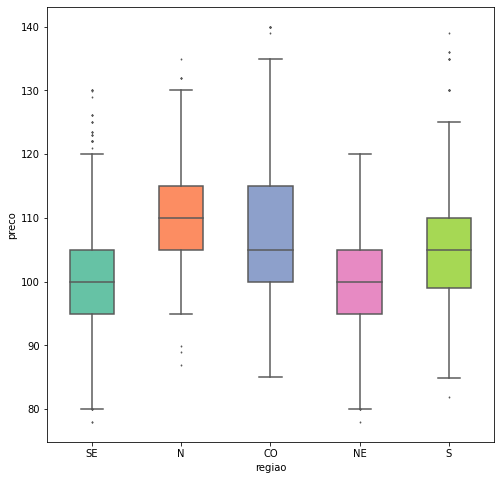

In [ ]:
#getting price and region information
preco_regiao = precogas.select(col('Regiao - Sigla').alias('regiao'), col('Valor de Venda').alias('preco')).toPandas()

#importing the graphics libraries
import seaborn as sns
import matplotlib.pyplot as plt

#generating a boxplot
plt.figure(figsize = (8,8))
sns.boxplot(data=preco_regiao, y = 'preco', x = 'regiao', 
            orient = 'v', palette = 'Set2', fliersize = 1, 
            width=0.5, saturation=1)
plt.show()

### **Final comments**


The official PySpark documentation is extremely helpful and can be accessed at: https://spark.apache.org/docs/latest/api/python/reference/

There are still other sites that can help you find examples and answer questions about methods and functions such as:

https://sparkbyexamples.com/pyspark/